<a href="https://colab.research.google.com/github/moomoo2202/2048-BOT/blob/master/Homework_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS/ECE 181: Homework Assignment #2

<small>v1.0.1</small>

**DUE DATE**: October 23, 11:59pm Pacific via GauchoSpace

* You can save a copy of this document in your own Drive and work on it in your own Colab
* When you're done, select "Download .ipynb" and drop the file in the Homework Assignment #2 folder on GauchoSpace.
* You can add comments, multiple cells, etc. Just make sure to explain what you did so that we can give you partial credit.
* Remember, you are expected to work alone. You can discuss a solution approach with your peers, but you must not copy their code. The implementation must be yours. If you google how to do stuff (or use open-source code or libraries) you must acknowledge your sources.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow


# 1. Homography (25pts)

In this part we want to apply a perspective projection to [Storke Tower](https://drive.google.com/file/d/1H144iSqUWhH3LKu-89s1hJBPVpyVU7fw/view?usp=sharing) using `cv2.warpProjection`.

You should be able to access the image at the GDrive link above. You'll want to download it to your computer, then upload to Colab using the "Files" icon in the left sidebar.

The image looks like this:

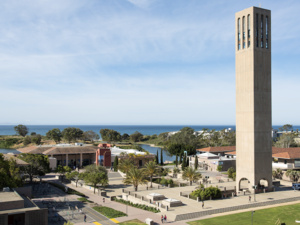

## 1.1 Load the Image (1pt)

First step is to load the image using `cv2.imread`. Use `cv2_imshow` (**note:** not `cv2.imshow`) to make sure you loaded the file correctly. Then store the height of the image in variable `h` and the width of the image in variable `w`.

In [ ]:
img = cv2.imread("storke.jpg")
cv2_imshow(img)

In [ ]:
...

## 1.2 Affine Transformations (14pts)

In this section, we will apply a number of affine transformations to the image by writing our own transformation matrices using NumPy arrays.

> **Note**: `cv2.warpPerspective` should be the only OpenCV function to use in Section 1.2.

### 1.2.1 Apply Translation (6pts)

Write a function that takes as input `tx` and `ty`, which specify by how many pixels the image should be shifted, and returns a projection matrix that can be applied to a 2D image with `cv2.warpPerspective` to shift an image.

> **Hint:** Because OpenCV is written in C++ (we're just using the Python bindings), data types are important. If you create a NumPy array (here and throughout the assignment), make sure to specify `dtype=np.float32` or similar. Otherwise you might get cryptic error messages (and rarely, more specific ones like "Assertion failed, M0.type() == CV_32F").

In [ ]:
def trans(tx, ty):
    ...
    return ...

Now use your function to shift the image:

* vertically: 20 pixels down
* horizontally: 50 pixels to the left


In [ ]:
...

Display the shifted image to make sure you did it right:

In [ ]:
...

Do you see a black border? Where does that come from (what is the meaning of it)?

---

**YOUR ANSWER HERE**

---

How is the coordinate system oriented here? That is:
- Where is the origin of the coordinate system?
- How does `tx` shift the image? (rows vs. columns, up vs. down, left vs. right)
- How does `ty` shift the image? (rows vs. columns, up vs. down, left vs. right)

---

**YOUR ANSWER HERE**

---

### 1.2.2 Scale the Image (3pts)

Write a function that takes as input a scale factor `s` and returns a projection matrix that can be applied to a 2D image with `cv2.warpPerspective` to scale an image by factor `s`.

In [ ]:
def scale(s):
    ...
    return ...

Now use your function to scale the image by factor 0.5.

In [ ]:
...

Can you shift the down-scaled Storke tower image so that it appears in the center of the projected image? i.e. something that looks like this:

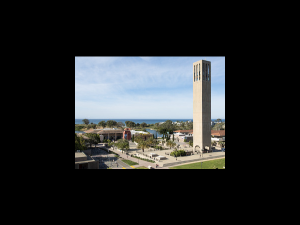

In [ ]:
...

### 1.2.3 Apply Rotation (5 pts)

Finally, write a function that takes as input an angle `theta` and returns a projection matrix that can be applied to a 2D image with `cv2.warpPerspective` to rotate an image counter-clockwise by `theta` degrees.

In [ ]:
def rot(theta):
    ...
    return ...

Now use your function to rotate the image counter-clockwise by 45 degrees.

In [ ]:
...

Now take the downscaled image from Section 1.2.2 (scale factor 0.5), rotate it by 45 degrees and shift it to the center of the image, such that the end result looks like this:

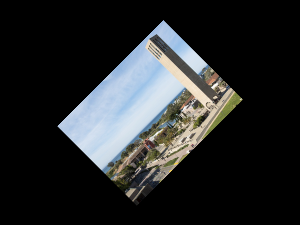

In [ ]:
...

## 1.3 Homography (10pts)

Now let's consider the general case, where the projection matrix is given as:

$$H = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & 1\end{bmatrix}$$

We already know what variables $a$ through $f$ do from Section 1.2 (and the lecture slides), but what are $g$ and $h$ good for?

> **Note**: `cv2.warpPerspective` and `cv2.findHomography` should be the only two OpenCV functions to use in Section 1.3.

### 1.3.1 Variable $g$ (3pts)

What happens when you change $g$? To answer this, you'll want to start from an identity matrix and slowly increase/decrease $g$. How does the image change, and how would you describe this transformation? Show your work.

> **Hint:** You may want to downscale the Storke image first and shift it to the center of the projected image (like we did above). Then it will be a little easier to see what transformation is taking place.

---

**YOUR ANSWER HERE**

---

In [ ]:
...

### 1.3.2 Variable $h$ (3pts)

Same question, but for the other variable, $h$?

---

**YOUR ANSWER HERE**

---

In [ ]:
...

### 1.3.3 Compute Homography Matrix (4pts)

Lastly, we may want the image to look a certain way (e.g., projected onto a ground plane), but we might not know which homography matrix can get us there.

This is where `cv2.findHomography` can be very helpful - it basically lets you specify where a number of points in the source image (`pts_src`) should be projected to in a new, destination image (`pts_dst`).

In the following cell(s), find the homography matrix that:

* shifts the upper left corner of the image `h/2` pixels down and `w/4` pixels to the right
* shifts the upper right corner of the image `h/2` pixels down and `w/4` pixels to the left
* but leaves the lower left & right corners where they are

If you did it right, your resulting image should look like this:

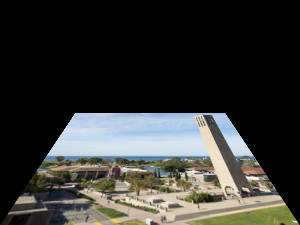

In [ ]:
...

What is the resulting homography matrix? Print it here

# 2. Epipolar Geometry (20pts)

In this section, we will concern ourselves with epipolar geometry, as shown in the image below:

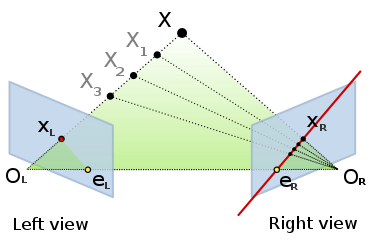

The standard setup involves two cameras observing the same 3D point $\vec{X}$, whose projections on each image plane is located at $\vec{x_L}$ and $\vec{x_R}$, respectively.
The two image points $\vec{e_L}$ and $\vec{e_R}$ are called epipolar points.
The line connecting $\vec{e_R}$ to $\vec{x_R}$ is called an epipolar line.
Finally, the plane spanned by the two camera origins ($\vec{O_L}$ and $\vec{O_R}$) and the point $\vec{X}$ is called the epipolar plane.

The two images look like this:

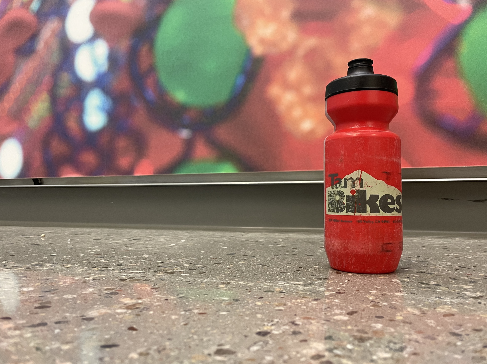

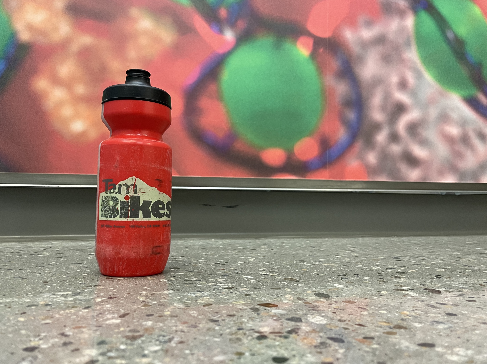

You can download these two images from the GDrive:
* [bottle 0](https://drive.google.com/file/d/1TdH_8P4YnBBaNXdwy6DkxiNSgF9JXbxA/view?usp=sharing)
* [bottle 1](https://drive.google.com/file/d/1V4eD2fIo4kxRRSJTrmy0Ew99poC9BreH/view?usp=sharing)

then upload them to Colab and load them with OpenCV:

In [ ]:
img_left = cv2.imread("bottle_undistorted_0.png")
img_right = cv2.imread("bottle_undistorted_1.png")

## 2.1 Finding Corresponding Points

We haven't really talked about this part, so below are two `Nx2` matrices you can use - no questions asked:
* `pts_left` contains a set of 2D coordinates of "interesting" points in the left image
* `pts_right` contains the corresponding 2D coordinates of these two points in the right image

In [ ]:
pts_left = np.array([[ 11.330687, 230.31277 ],
                    [102.660995, 343.10245 ],
                    [107.399025, 349.20395 ],
                    [245.5358  , 336.09415 ],
                    [248.10146 ,  51.210415],
                    [257.77466 ,  49.939182],
                    [258.7078  , 315.53647 ],
                    [258.71518 , 303.18536 ],
                    [265.12906 , 328.3929  ],
                    [266.28253 , 342.67108 ],
                    [267.06937 , 337.76752 ],
                    [268.1294  , 320.7461  ],
                    [274.17627 ,  90.27859 ],
                    [275.66516 , 319.9422  ],
                    [280.93637 , 307.63144 ],
                    [286.88733 , 327.064   ],
                    [292.99057 , 322.74606 ],
                    [294.04175 ,  72.502846],
                    [294.30835 , 332.73508 ],
                    [294.30835 , 332.73508 ],
                    [294.79813 , 201.47769 ],
                    [300.222   ,  16.567745],
                    [305.10294 , 340.444   ],
                    [307.4023  ,  89.780365],
                    [310.9552  ,  41.48591 ],
                    [310.9552  ,  41.48591 ],
                    [312.17548 , 241.4611  ],
                    [314.15878 , 327.70755 ],
                    [314.44928 , 326.03363 ],
                    [318.3607  , 346.16846 ],
                    [319.63077 , 237.07678 ],
                    [322.03137 , 108.27745 ],
                    [322.80258 , 108.31181 ],
                    [325.11636 , 326.4465  ],
                    [326.3772  , 353.5166  ],
                    [326.59824 , 296.815   ],
                    [326.59824 , 296.815   ],
                    [326.64862 , 293.28552 ],
                    [326.64862 , 293.28552 ],
                    [327.4244  , 345.88806 ],
                    [328.507   , 189.0751  ],
                    [329.64868 , 125.05227 ],
                    [330.2293  , 203.05629 ],
                    [330.42114 , 218.33134 ],
                    [330.76456 , 294.94257 ],
                    [330.86362 , 146.35521 ],
                    [332.59546 ,  94.35712 ],
                    [333.12927 , 343.12485 ],
                    [334.38156 , 179.16617 ],
                    [334.61182 ,  88.46822 ],
                    [335.2108  , 317.21866 ],
                    [335.4466  , 348.0052  ],
                    [335.6442  , 314.21036 ],
                    [336.23935 , 243.46121 ],
                    [336.50208 , 355.15643 ],
                    [337.11334 , 311.2207  ],
                    [337.12604 , 351.54117 ],
                    [337.12604 , 351.54117 ],
                    [337.40854 , 197.47331 ],
                    [340.58438 , 193.60756 ],
                    [341.27948 , 308.62357 ],
                    [341.4118  , 263.48077 ],
                    [341.70584 ,  72.03143 ],
                    [342.63535 , 184.36368 ],
                    [343.79678 , 348.16565 ],
                    [343.91364 , 360.53244 ],
                    [344.81174 , 322.82104 ],
                    [346.70126 ,  93.11783 ],
                    [348.36652 ,  98.4224  ],
                    [349.0414  , 327.0407  ],
                    [349.0526  , 357.38016 ],
                    [349.10764 , 182.48538 ],
                    [349.16495 ,  63.507362],
                    [349.85535 ,  90.2212  ],
                    [353.90344 , 131.48636 ],
                    [354.46252 , 354.54776 ],
                    [354.76602 , 174.34782 ],
                    [354.98434 , 337.39273 ],
                    [354.98434 , 337.39273 ],
                    [356.05856 , 342.08383 ],
                    [357.17603 , 182.64899 ],
                    [357.43472 , 187.08939 ],
                    [357.65295 , 190.88579 ],
                    [357.99765 , 330.5939  ],
                    [358.4324  , 200.41145 ],
                    [360.00137 ,  91.964714],
                    [360.00137 ,  91.964714],
                    [360.46704 , 179.56674 ],
                    [361.2772  , 186.40271 ],
                    [361.2772  , 186.40271 ],
                    [363.3845  , 214.22304 ],
                    [365.59164 , 176.24968 ],
                    [365.7834  , 220.23631 ],
                    [366.50897 ,  63.449043],
                    [366.54175 , 177.10857 ],
                    [368.04    , 213.27908 ],
                    [368.43027 , 255.96628 ],
                    [370.71823 , 273.1475  ],
                    [371.2308  , 344.958   ],
                    [371.34024 , 341.40198 ],
                    [373.07355 ,  96.231735],
                    [374.2307  , 357.19742 ],
                    [375.58572 , 187.05746 ],
                    [378.74625 , 325.77686 ],
                    [381.46228 , 213.29475 ],
                    [381.46228 , 213.29475 ],
                    [382.8811  , 114.31251 ],
                    [384.37534 , 219.76898 ],
                    [384.88077 , 358.69333 ],
                    [386.59882 , 196.12592 ],
                    [387.46677 ,  84.34325 ],
                    [388.34146 , 176.34839 ],
                    [390.94626 , 197.07945 ],
                    [392.09552 ,  17.996243],
                    [392.8685  , 145.56584 ],
                    [394.724   , 213.37704 ],
                    [395.87808 , 350.05582 ],
                    [397.38373 , 345.96362 ],
                    [398.157   , 196.96562 ],
                    [400.08633 ,  64.419685],
                    [401.44196 , 349.05566 ],
                    [404.95178 , 353.7858  ],
                    [406.96402 , 336.12598 ],
                    [408.24698 , 349.38632 ],
                    [408.65964 , 349.2897  ],
                    [408.65964 , 349.2897  ],
                    [412.1792  , 356.56024 ],
                    [413.33215 , 245.29327 ],
                    [413.33215 , 245.29327 ],
                    [414.54977 , 353.6721  ],
                    [419.38    , 331.87146 ],
                    [423.34195 , 312.6812  ],
                    [423.83786 ,  77.1013  ],
                    [431.26877 , 322.28232 ],
                    [433.14304 , 338.5029  ],
                    [433.50177 , 121.67971 ],
                    [434.2415  , 241.4721  ],
                    [439.69037 , 338.05643 ],
                    [448.47244 , 343.22214 ],
                    [452.16995 , 338.6123  ],
                    [453.29474 ,  97.83127 ],
                    [458.77698 , 343.08325 ],
                    [464.61505 ,  47.941986],
                    [472.96658 , 357.63123 ],
                    [477.3348  , 354.23328 ],
                    [477.46405 , 327.59595 ],
                    [479.275   , 345.20514 ]], dtype=np.float32)

pts_right = np.array([[ 10.451885, 245.95746 ],
                    [420.61487 , 341.68527 ],
                    [269.49442 , 300.9356  ],
                    [ 11.968343, 353.29446 ],
                    [ 12.918042,  35.032314],
                    [ 24.19519 ,  35.752907],
                    [ 22.954094, 331.6035  ],
                    [ 21.639832, 319.03436 ],
                    [ 32.227203, 343.88293 ],
                    [ 35.229607, 357.6763  ],
                    [ 35.619865, 352.5409  ],
                    [ 35.157455, 336.0241  ],
                    [ 40.92455 ,  83.41116 ],
                    [ 42.904415, 334.1595  ],
                    [ 47.500015, 320.90543 ],
                    [ 56.28695 , 339.60944 ],
                    [ 62.648468, 334.1968  ],
                    [ 65.9272  ,  68.41101 ],
                    [ 64.749146, 343.877   ],
                    [ 64.749146, 343.877   ],
                    [ 61.371742, 206.5538  ],
                    [ 74.9793  ,  10.732956],
                    [ 76.81946 , 349.48312 ],
                    [ 80.119576,  89.05219 ],
                    [ 85.93024 ,  39.437916],
                    [ 85.93024 ,  39.437916],
                    [ 83.81026 , 248.42801 ],
                    [ 86.234886, 335.67538 ],
                    [ 86.37255 , 333.83398 ],
                    [ 91.67011 , 352.2627  ],
                    [ 92.83924 , 243.05824 ],
                    [ 99.350845, 109.74975 ],
                    [ 99.350845, 109.74975 ],
                    [ 97.824554, 332.58887 ],
                    [100.05056 , 357.9085  ],
                    [ 97.969284, 303.4299  ],
                    [ 97.969284, 303.4299  ],
                    [ 98.5963  , 299.57455 ],
                    [ 98.5963  , 299.57455 ],
                    [100.664246, 350.45972 ],
                    [103.09705 , 194.04305 ],
                    [105.6225  , 129.69585 ],
                    [126.01422 , 215.73553 ],
                    [102.41082 , 223.89827 ],
                    [102.017265, 301.1238  ],
                    [106.70513 , 151.98213 ],
                    [111.71884 ,  99.22655 ],
                    [104.1305  , 347.73248 ],
                    [109.00082 , 184.1784  ],
                    [111.664604,  93.96833 ],
                    [107.2546  , 321.92014 ],
                    [108.733444, 350.69135 ],
                    [107.742355, 318.92203 ],
                    [108.634796, 250.10301 ],
                    [109.681404, 357.4377  ],
                    [109.011536, 315.99933 ],
                    [111.484024, 353.93048 ],
                    [111.484024, 353.93048 ],
                    [111.02637 , 202.77103 ],
                    [114.74596 , 199.2722  ],
                    [113.04005 , 312.64957 ],
                    [111.46299 , 268.44016 ],
                    [120.958115,  79.72554 ],
                    [116.44203 , 190.13057 ],
                    [117.317375, 349.51736 ],
                    [118.18976 , 360.83942 ],
                    [117.483246, 325.62085 ],
                    [114.94386 , 101.18038 ],
                    [124.22317 , 106.12095 ],
                    [121.613884, 328.7626  ],
                    [122.69651 , 356.93622 ],
                    [123.32934 , 188.41338 ],
                    [127.10561 ,  71.89927 ],
                    [143.45338 ,  99.15524 ],
                    [129.01784 , 138.8502  ],
                    [127.64922 , 353.38736 ],
                    [129.24042 , 180.78426 ],
                    [127.3585  , 337.27924 ],
                    [127.3585  , 337.27924 ],
                    [128.71677 , 341.34622 ],
                    [130.92542 , 188.95485 ],
                    [131.26283 , 193.3558  ],
                    [131.87146 , 197.08733 ],
                    [129.89566 , 330.73334 ],
                    [133.07028 , 205.32082 ],
                    [133.82152 , 101.12232 ],
                    [133.82152 , 101.12232 ],
                    [134.50685 , 185.46284 ],
                    [135.26617 , 192.30927 ],
                    [135.26617 , 192.30927 ],
                    [135.53964 , 219.15169 ],
                    [140.192   , 183.26027 ],
                    [137.87318 , 224.95816 ],
                    [144.01689 ,  75.0213  ],
                    [140.192   , 183.26027 ],
                    [117.51092 , 218.41898 ],
                    [136.90924 , 259.09668 ],
                    [127.1143  , 276.19025 ],
                    [142.68762 , 341.55017 ],
                    [142.93564 , 338.2597  ],
                    [149.12299 , 107.47326 ],
                    [145.91885 , 351.84708 ],
                    [149.32454 , 193.54788 ],
                    [149.29053 , 323.03134 ],
                    [152.84612 , 218.42773 ],
                    [152.84612 , 218.42773 ],
                    [157.74086 , 125.11417 ],
                    [155.29967 , 224.53304 ],
                    [155.48079 , 351.46335 ],
                    [158.5289  , 201.97124 ],
                    [162.1586  ,  97.82939 ],
                    [160.13979 , 183.2894  ],
                    [161.54732 , 202.74947 ],
                    [167.01921 ,  35.592716],
                    [163.93298 , 155.493   ],
                    [164.16342 , 218.16473 ],
                    [165.02246 , 341.81766 ],
                    [166.50436 , 337.66565 ],
                    [168.04391 , 203.15901 ],
                    [172.27452 ,  79.116936],
                    [169.78957 , 339.9351  ],
                    [172.63239 , 343.72498 ],
                    [173.96643 , 327.94702 ],
                    [176.04584 , 339.02325 ],
                    [176.04584 , 339.02325 ],
                    [176.04584 , 339.02325 ],
                    [179.1508  , 344.96573 ],
                    [181.03616 , 247.16452 ],
                    [181.03616 , 247.16452 ],
                    [181.0112  , 342.09973 ],
                    [184.65971 , 322.456   ],
                    [187.18433 , 305.65344 ],
                    [192.32999 ,  94.148224],
                    [193.69972 , 312.78006 ],
                    [195.15369 , 326.44516 ],
                    [197.85905 , 135.60074 ],
                    [195.79475 , 242.40633 ],
                    [200.54637 , 325.32938 ],
                    [208.42905 , 329.0907  ],
                    [210.95728 , 324.29492 ],
                    [214.95572 , 117.20165 ],
                    [216.8051  , 327.67578 ],
                    [226.05014 ,  74.79224 ],
                    [230.03607 , 339.4113  ],
                    [233.52522 , 336.0274  ],
                    [231.38426 , 313.00302 ],
                    [234.03911 , 328.46994 ]], dtype=np.float32)

NameError: ignored

## 2.2 Visualize Corresponding Points

You can visualize the corresponding points with the following helper function:

In [ ]:
def draw_points(img_in, pts, color=None):
    img = img_in.copy()
    for pt in pts:
        c = color
        if c is None:
            c = tuple(np.random.randint(0, 255, 3).tolist())
        img = cv2.circle(img, pt.astype(int), 5, c, -1)
    return img

In [ ]:
cv2_imshow(draw_points(img_left, pts_left))

In [ ]:
cv2_imshow(draw_points(img_right, pts_right))

## 2.3 Fundamental Matrix (2pts)

Given a set of corresponding points in the left and right images, we should now be able to estimate the fundamental matrix:

In [ ]:
...

## 2.3 Essential Matrix (3pts)

Had we taken the pictures ourselves, we would have had to go through the entire camera calibration procedure to recover the intrinsic camera matrix and the distortion coefficients.
Luckily, these parameters are known for the camera that took these two pictures of the water bottle, so we can go ahead and hardcode these values in our code.

Using the fundamental matrix `F` and the intrinsic camera matrix, calculate the essential matrix `E` in the cell below:

In [ ]:
K = np.array([[3.0823149e+03, 0.0000000e+00, 1.9997557e+03],
              [0.0000000e+00, 3.0788130e+03, 1.4858296e+03],
              [0.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=np.float32)

In [ ]:
...

Now you can use `cv2.recoverPose` to recover the rotation and translation matrices:

In [ ]:
...

## 2.4 Epipolar Lines (5pts)

With the corresponding points, the fundamental matrix, and even the essential matrix in hand, you should now be able to calculate the epipolar lines.

In the below cells, draw the epipolar lines on the two images.

You can use any OpenCV function you like for this.

In [ ]:
...

## 2.4 Stitch the Two Images Together (10pts)

The last task for this assignment is to stich the two images together.

To do this, you'll basically want to project `img_right` onto the same plane as `img_left`.

In the lectures, we have seen a couple of ways to do this. Quantities that could be important for this task include the homography matrix, the intrinsic matrix, the essential matrix, and the fundamental matrix.

Pick your favorite strategy to stitch the two images together. You can use any OpenCV function you like for this.

To get full credit, show your work (i.e., comment your code and explain your steps/thinking) and the resulting image.

In [ ]:
...

Ellipsis